<b> THE SPARKS FOUNDATION INTERNSHIP </b> 

<b> TASK-1 </b>

Question: (To Explore Supervised Machine Learning)
In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables. Data can be found at http://bit.ly/w-data
What will be predicted score if a student study for 9.25 hrs in a day?

<b>IMPORTING LIBRARIES</b>

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<b> READING DATA </b>

In [145]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<b>DESCRIBING  THE DATA</b>

In [146]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b> VIZUALIZING DATA </b>

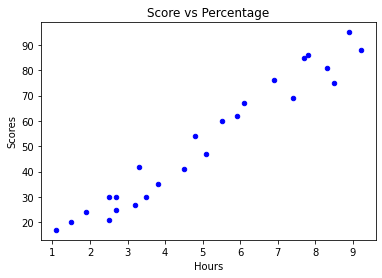

In [147]:
data.plot.scatter(x = 'Hours', y = 'Scores', color = 'b')
plt.title('Score vs Percentage')
plt.show()

<b>Finding Correlation</b>

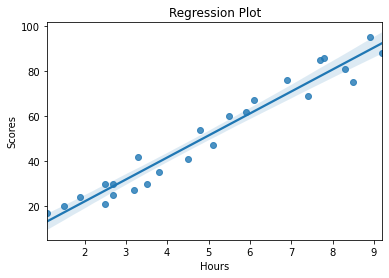

Correlation coefficient is 0.9761906560220887


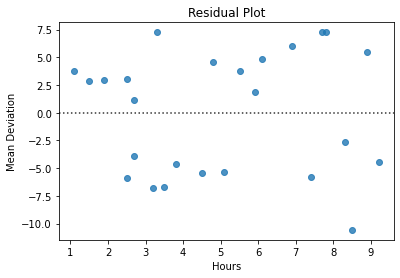

In [123]:
sns.regplot(x = 'Hours',
           y = 'Scores',
           data = data)
plt.title('Regression Plot')
plt.show()
corr = data['Hours'].corr(data['Scores'])
print('Correlation coefficient is', corr)
sns.residplot(data['Hours'],data['Scores'])
plt.title('Residual Plot')
plt.ylabel('Mean Deviation')
plt.show()

<b> Preparing Data for Analysis </b>

In [148]:
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores'])

Splitting data into test set and random set

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Applying linear model on test set

In [150]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Intercept of the linear curve:  ',lm.intercept_)
print('Sploe of the line:  ',lm.coef_)
print('R-square value:  ',lm.score(X_train,y_train))

Intercept of the linear curve:   2.018160041434683
Sploe of the line:   [9.91065648]
R-square value:   0.9515510725211552


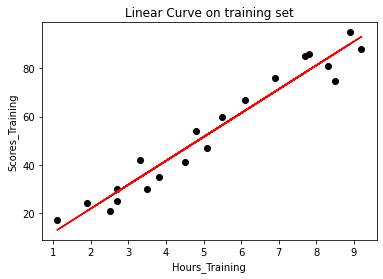

In [151]:
y_train_pred = lm.predict(X_train)
plt.scatter(X_train,y_train, color ='k', label = 'Test Values')
plt.plot(X_train, lm.predict(X_train), color ='r', label = 'Predicted line')
plt.xlabel('Hours_Training')
plt.ylabel('Scores_Training')
plt.title('Linear Curve on training set')
plt.show()

In [152]:
y_test_pred = lm.predict(X_test)
predicted_y = pd.DataFrame({'X_test':X_test.reshape(len(X_test)),'y_test': y_test,'y_test_pred':y_test_pred})
print(predicted_y)

   X_test  y_test  y_test_pred
0     1.5      20    16.884145
1     3.2      27    33.732261
2     7.4      69    75.357018
3     2.5      30    26.794801
4     5.9      62    60.491033


<b> Evaluating the curve fitting over Training set </b>

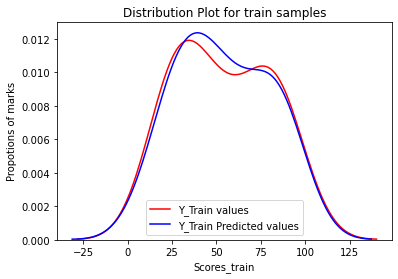

In [153]:
ax1 = sns.distplot(y_train,hist = False, color ='r', label = 'Y_Train values')
sns.distplot(lm.predict(X_train),hist = False, color ='b', label = 'Y_Train Predicted values')
plt.title('Distribution Plot for train samples')
plt.ylabel('Propotions of marks')
plt.xlabel('Scores_train')
plt.show()

<b>Evaluating Curve Fitting over Test Set </b>

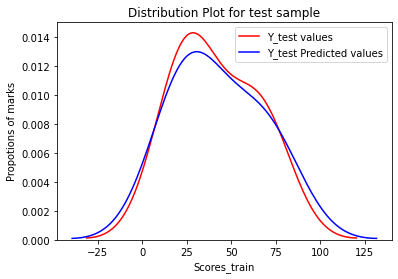

In [154]:
ax1 = sns.distplot(y_test,hist = False, color ='r', label = 'Y_test values')
sns.distplot(lm.predict(X_test),hist = False, color ='b', label = 'Y_test Predicted values')
plt.title('Distribution Plot for test sample')
plt.ylabel('Propotions of marks')
plt.xlabel('Scores_train')
plt.show()

In [155]:
from sklearn.metrics import mean_squared_error
print('mean square error on test sample', mean_squared_error(y_test,lm.predict(X_test)))


mean square error on test sample 21.5987693072174


<b> PREDICTING SCORES WHEN HOURS = 9.25 </b>

In [157]:
print('Scores when student studied for 9.25 hrs', lm.predict([[9.25]]))

Scores when student studied for 9.25 hrs [93.69173249]


<b> Problem with linear regression: If the no. of hours increases, then the scores percentage will shoot beyond 100. Howver and ideal curve should be able to flatten the scores to 100 as the no. of hours increases </b>

In [158]:
print('Scores when student studied for 15 hrs', lm.predict([[15]]))
print('Scores when student studied for 23.22 hrs', lm.predict([[23.22]]))

Scores when student studied for 15 hrs [150.67800725]
Scores when student studied for 23.22 hrs [232.14360352]


<b> IMPROVED MODEL </b>
Here in this mode, I have tried to fir a plateau curve as the score percentage should not go beond 100, therefore the plateau curve should flaten out as the percentage reaches 100.
I have used curve_fit() from scipy.optimize to fit and optimize the desired curved. And as expected, this model worked way better that the above linear model, and this model ws able to describe the properties of the data set properly

In [159]:
x = data['Hours']
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<b> Defining the Plateau function </b>

In [160]:
def func (x, a, b, c):
    z = 100*(1-np.exp(-1*a*x**2-b*x-c))
    return z

<b> Training the function on X_test and y_test</b>

In [161]:
theta1 = curve_fit(func,X_train,y_train)

C:\Users\mayan\miniconda3\envs\name_of_my_env\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [162]:
[a,b,c]=theta1[0]

<b> Testing the trained model on test samle </b>

In [163]:
y_test_pred = func(X_test,a,b,c)
yhat = func(x,a,b,c)
print('mean square error on test sample', mean_squared_error(y_test,y_test_pred))
pd.DataFrame({'Y_test':y_test,'Y_Test_Predict':y_test_pred})

mean square error on test sample 21.335205111448623


,Y_test,Y_Test_Predict
5,20,18.250819
2,27,31.620461
19,69,77.371447
16,30,25.007874
11,62,62.557984
22,35,38.130348
17,24,20.513747
24,86,80.614231


<b> predicted value by the model vs actual value </b>

In [139]:
pd.DataFrame({'Y_Data':y,'Y_Test_Predict':yhat})

,Y_Data,Y_Test_Predict
0,21,25.007874
1,47,53.380595
2,27,31.620461
3,75,85.513635
4,30,34.799592
5,20,18.250819
6,88,89.455646
7,60,58.040840
8,81,84.213934
9,25,26.763698


<b> Plotting the data against the trained model </b>

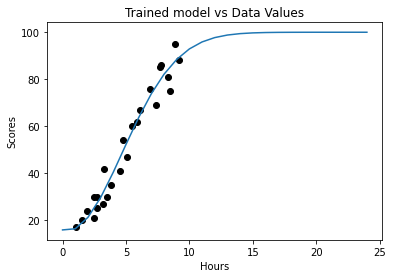

In [164]:
x_grid = np.arange(0,25,1)
x_grid = x_grid.reshape((len(x_grid), 1))
y_pred = func(x_grid,a,b,c)
plt.plot(x_grid,y_pred)
plt.scatter(data['Hours'],data['Scores'], color = 'k')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Trained model vs Data Values')
plt.show()

<b> Predicting scores </b>

In [166]:
ans = func(9.25,a,b,c)
print('Scores when student studied for 9.25 hrs', func(9.25,a,b,c))
print('Scores when student studied for 15 hrs', func(15,a,b,c))
print('Scores when student studied for 23.22 hrs', func(23.22,a,b,c))

Scores when student studied for 9.25 hrs 89.7025352499153
Scores when student studied for 15 hrs 99.72398472092713
Scores when student studied for 23.22 hrs 99.99992817515171


<b> The Model covers the complete distribution of the given data set </b>

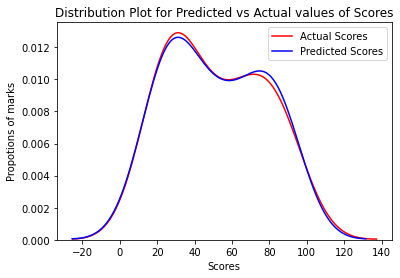

In [167]:
ax1 = sns.distplot(y,hist = False, color ='r', label = 'Actual Scores')
sns.distplot(yhat,hist = False, color ='b', label = 'Predicted Scores')
plt.title('Distribution Plot for Predicted vs Actual values of Scores')
plt.ylabel('Propotions of marks')
plt.xlabel('Scores')
plt.show()